In [1]:
import numpy as np
import pandas as pd

print(np.__version__)
print(pd.__version__)


1.26.4
2.3.3


In [4]:
df = pd.read_csv(r"C:\Users\adity\Downloads\master_dataset_phase3_features.csv")
df.head() 

,state,district,pincode,age_0_5,age_5_17,age_18_greater,demo_age_5_17,demo_age_17_,bio_age_5_17,bio_age_17_,total_enrolment,total_demo_updates,total_bio_updates,child_enrol_ratio,adult_enrol_ratio,demo_update_ratio,bio_update_ratio,update_efficiency,adult_update_pressure,child_update_gap
0,100000,100000,100000,0,1,217,0.0,2.0,0.0,0.0,218,2.0,0.0,0.004587,0.995413,0.009174,0.000000,0.009174,0.009217,1.000000
1,Andaman & Nicobar Islands,Andamans,744101,8,1,0,4.0,299.0,177.0,1147.0,9,303.0,1324.0,1.000000,0.000000,33.666667,147.111111,180.777778,0.000000,-19.111111
2,Andaman & Nicobar Islands,Andamans,744103,24,1,0,1.0,147.0,63.0,152.0,25,148.0,215.0,1.000000,0.000000,5.920000,8.600000,14.520000,0.000000,-1.560000
3,Andaman & Nicobar Islands,Andamans,744105,22,0,0,1.0,135.0,43.0,157.0,22,136.0,200.0,1.000000,0.000000,6.181818,9.090909,15.272727,0.000000,-1.000000
4,Andaman & Nicobar Islands,Andamans,744106,3,2,0,0.0,66.0,37.0,125.0,5,66.0,162.0,1.000000,0.000000,13.200000,32.400000,45.600000,0.000000,-6.400000


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)


In [6]:
df = df[df["state"] != "100000"]
df.shape


(28981, 20)

In [7]:
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 28981 entries, 1 to 28981
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  28981 non-null  object 
 1   district               28981 non-null  object 
 2   pincode                28981 non-null  int64  
 3   age_0_5                28981 non-null  int64  
 4   age_5_17               28981 non-null  int64  
 5   age_18_greater         28981 non-null  int64  
 6   demo_age_5_17          28981 non-null  float64
 7   demo_age_17_           28981 non-null  float64
 8   bio_age_5_17           28981 non-null  float64
 9   bio_age_17_            28981 non-null  float64
 10  total_enrolment        28981 non-null  int64  
 11  total_demo_updates     28981 non-null  float64
 12  total_bio_updates      28981 non-null  float64
 13  child_enrol_ratio      28981 non-null  float64
 14  adult_enrol_ratio      28981 non-null  float64
 15  demo_up

state                    0
district                 0
pincode                  0
age_0_5                  0
age_5_17                 0
age_18_greater           0
demo_age_5_17            0
demo_age_17_             0
bio_age_5_17             0
bio_age_17_              0
total_enrolment          0
total_demo_updates       0
total_bio_updates        0
child_enrol_ratio        0
adult_enrol_ratio        0
demo_update_ratio        0
bio_update_ratio         0
update_efficiency        0
adult_update_pressure    0
child_update_gap         0
dtype: int64

In [8]:
np.isinf(df.select_dtypes(include=[np.number])).sum()


pincode                  0
age_0_5                  0
age_5_17                 0
age_18_greater           0
demo_age_5_17            0
demo_age_17_             0
bio_age_5_17             0
bio_age_17_              0
total_enrolment          0
total_demo_updates       0
total_bio_updates        0
child_enrol_ratio        0
adult_enrol_ratio        0
demo_update_ratio        0
bio_update_ratio         0
update_efficiency        0
adult_update_pressure    0
child_update_gap         0
dtype: int64

In [9]:
key_cols = [
    "total_enrolment",
    "total_demo_updates",
    "total_bio_updates",
    "update_efficiency",
    "child_update_gap"
]

df[key_cols].describe()


,total_enrolment,total_demo_updates,total_bio_updates,update_efficiency,child_update_gap
count,28981.000000,28981.000000,28981.000000,28981.000000,28981.000000
mean,187.553363,1700.145199,2406.660985,30.757867,-9.134338
std,466.983503,3723.638682,3892.954266,26.326874,10.467291
min,1.000000,0.000000,0.000000,0.000000,-626.000000
25%,18.000000,152.000000,255.000000,16.840909,-12.073930
50%,59.000000,569.000000,1106.000000,26.190476,-7.537500
75%,173.000000,1736.000000,2933.000000,38.190647,-3.447077
max,15122.000000,115643.000000,78727.000000,909.000000,1.000000


In [10]:
df[key_cols].skew()


total_enrolment        9.623338
total_demo_updates     8.599837
total_bio_updates      4.748586
update_efficiency      8.211942
child_update_gap     -14.667801
dtype: float64

#### | Feature            | Interpretation                                                          |
| ------------------ | ----------------------------------------------------------------------- |
| total_enrolment    | Extremely right-skewed → a few pincodes dominate enrolments             |
| total_demo_updates | Same → updates are concentrated                                         |
| total_bio_updates  | Still skewed but less extreme                                           |
| update_efficiency  | Highly uneven system performance                                        |
| child_update_gap   | Extremely left-skewed → many regions have *update surplus* vs enrolment |


In [11]:
(df[key_cols] == 0).sum()


total_enrolment         0
total_demo_updates    538
total_bio_updates     584
update_efficiency     364
child_update_gap      450
dtype: int64

In [12]:
Metric	Meaning
total_enrolment = 0	Good — no pincode is completely inactive for enrolment
total_demo_updates = 538	538 pincodes have no demographic updates
total_bio_updates = 584	584 pincodes have no biometric updates
update_efficiency = 364	364 pincodes have zero total update load
child_update_gap = 450	450 pincodes have perfectly balanced or null child update behavior

Key Insight--------

Aadhaar enrolment is universally present

But update services are not

~2% of pincodes lack biometric or demographic update activity

This suggests:

Infrastructure gaps

Awareness gaps

Or regional administrative differences

This becomes a policy recommendation later.

SyntaxError: invalid character '—' (U+2014) (2836121792.py, line 2)

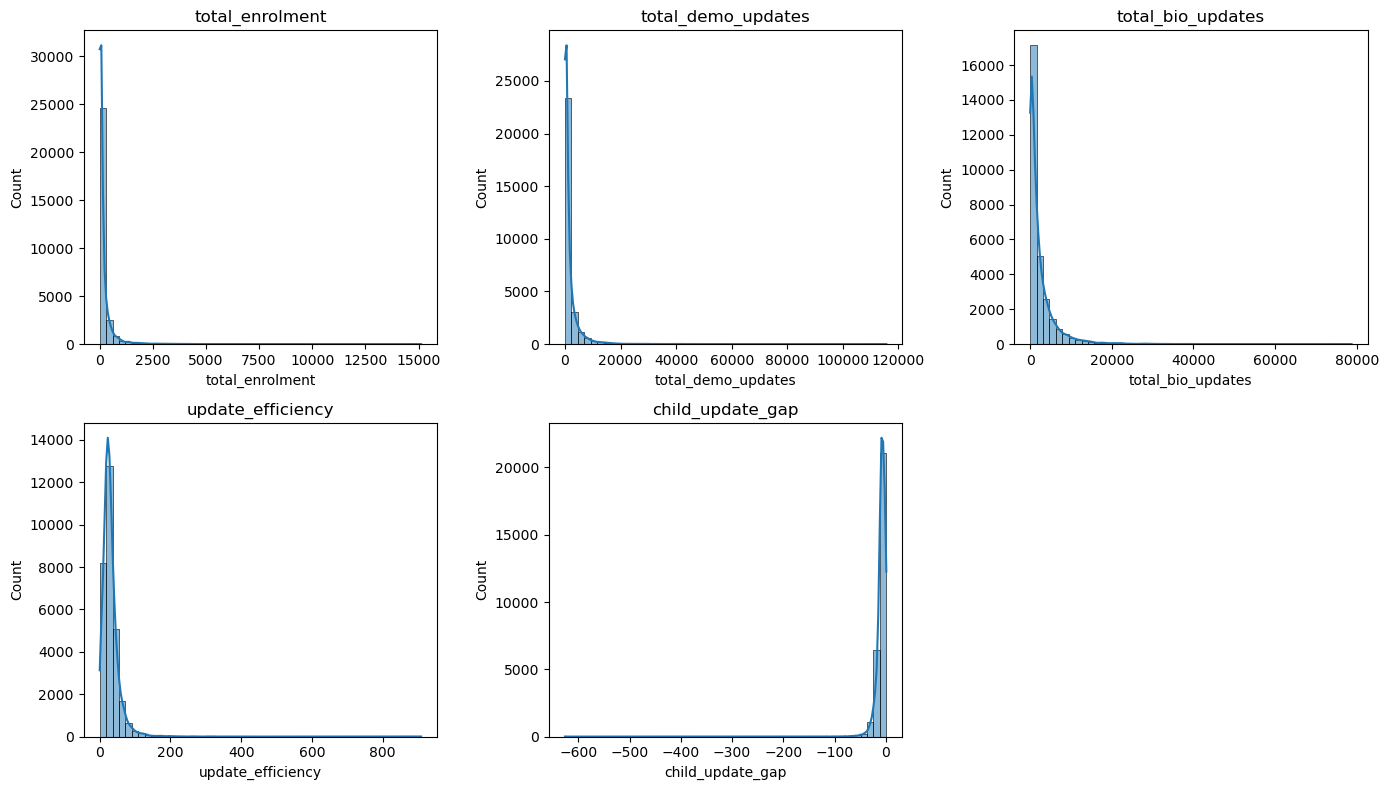

In [13]:
key_cols = [
    "total_enrolment",
    "total_demo_updates",
    "total_bio_updates",
    "update_efficiency",
    "child_update_gap"
]

plt.figure(figsize=(14,8))
for i, col in enumerate(key_cols, 1):
    plt.subplot(2,3,i)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


In [ ]:
total_enrolment, total_demo_updates, total_bio_updates → extremely right-skewed
✔ Most pincodes have small values
✔ Few pincodes have very large values

update_efficiency → right-skewed but less extreme
✔ Most regions low/moderate
✔ Few regions very high efficiency

child_update_gap → strongly left-skewed
✔ Most values close to zero or negative
✔ Indicates update surplus vs enrolment for many pincodes

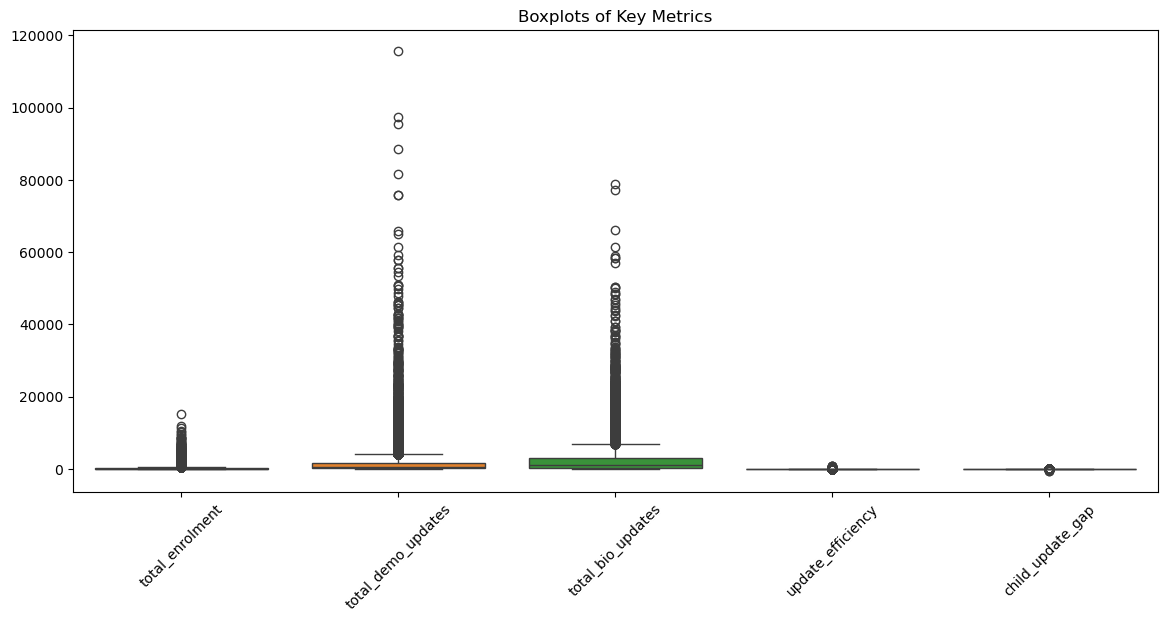

In [14]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df[key_cols])
plt.xticks(rotation=45)
plt.title("Boxplots of Key Metrics")
plt.show()

In [ ]:
From your boxplot:

total_demo_updates and total_bio_updates have huge numbers of extreme outliers.

The boxes are compressed near zero → most pincodes have very low activity.

A small number of pincodes have extremely high volumes (urban / administrative hubs).

update_efficiency has fewer outliers but still skewed.

child_update_gap is tightly packed near zero with a long negative tail.

🔹 Conclusion

✔ The data is not normally distributed
✔ Mean is misleading; median and percentiles are better
✔ Strong heterogeneity across regions
✔ Validates the need for segmentation and clustering



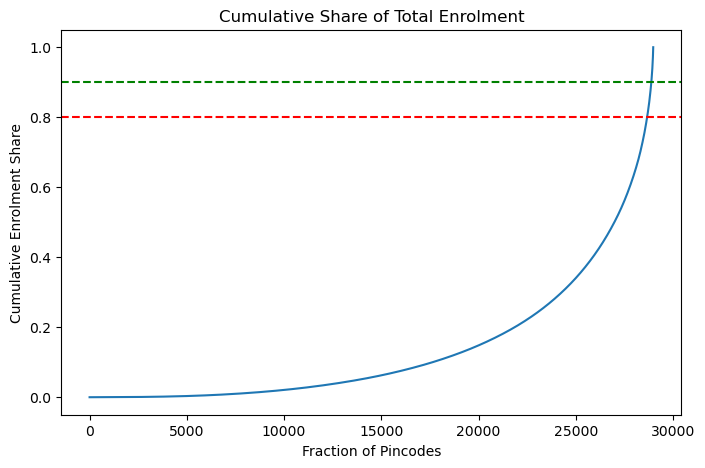

In [15]:
sorted_vals = np.sort(df["total_enrolment"])
cum_share = np.cumsum(sorted_vals) / sorted_vals.sum()

plt.figure(figsize=(8,5))
plt.plot(cum_share)
plt.axhline(0.8, color="red", linestyle="--")
plt.axhline(0.9, color="green", linestyle="--")
plt.title("Cumulative Share of Total Enrolment")
plt.xlabel("Fraction of Pincodes")
plt.ylabel("Cumulative Enrolment Share")
plt.show()


In [ ]:
From your plot:

The curve stays very flat for most of the x-axis

It rises sharply only at the very end

This means:

Most pincodes contribute very little to total enrolment, and a very small fraction of pincodes contribute almost everything.

More formally:

~80% of enrolment is done by roughly the top ~10–15% of pincodes

~90% is done by the top ~5% or less

This is a strong Pareto / power-law distribution.


    

🧠 Key Insight

Aadhaar enrolment infrastructure is highly centralized in a few geographic hubs, while the majority of regions are low-volume and underserved.

This is exactly the kind of insight hackathon juries love because it:

Is empirical

Is visual

Has policy implications

In [16]:
corr_cols = [
    "total_enrolment",
    "total_demo_updates",
    "total_bio_updates",
    "child_enrol_ratio",
    "adult_enrol_ratio",
    "demo_update_ratio",
    "bio_update_ratio",
    "update_efficiency",
    "adult_update_pressure",
    "child_update_gap"
]


In [17]:
corr = df[corr_cols].corr()
corr


,total_enrolment,total_demo_updates,total_bio_updates,child_enrol_ratio,adult_enrol_ratio,demo_update_ratio,bio_update_ratio,update_efficiency,adult_update_pressure,child_update_gap
total_enrolment,1.000000,0.768621,0.732817,-0.051605,0.051605,-0.093776,-0.131433,-0.135185,0.179909,0.108019
total_demo_updates,0.768621,1.000000,0.828477,0.026572,-0.026572,0.109952,-0.036112,0.022756,0.388171,0.010542
total_bio_updates,0.732817,0.828477,1.000000,0.050168,-0.050168,0.030896,0.080170,0.070849,0.431335,-0.063857
child_enrol_ratio,-0.051605,0.026572,0.050168,1.000000,-1.000000,0.047102,0.095996,0.089296,0.049771,-0.058736
adult_enrol_ratio,0.051605,-0.026572,-0.050168,-1.000000,1.000000,-0.047102,-0.095996,-0.089296,-0.049771,0.058736
demo_update_ratio,-0.093776,0.109952,0.030896,0.047102,-0.047102,1.000000,0.469744,0.776584,0.095277,-0.407231
bio_update_ratio,-0.131433,-0.036112,0.080170,0.095996,-0.095996,0.469744,1.000000,0.920973,0.044873,-0.846694
update_efficiency,-0.135185,0.022756,0.070849,0.089296,-0.089296,0.776584,0.920973,1.000000,0.074075,-0.783976
adult_update_pressure,0.179909,0.388171,0.431335,0.049771,-0.049771,0.095277,0.044873,0.074075,1.000000,-0.033818
child_update_gap,0.108019,0.010542,-0.063857,-0.058736,0.058736,-0.407231,-0.846694,-0.783976,-0.033818,1.000000


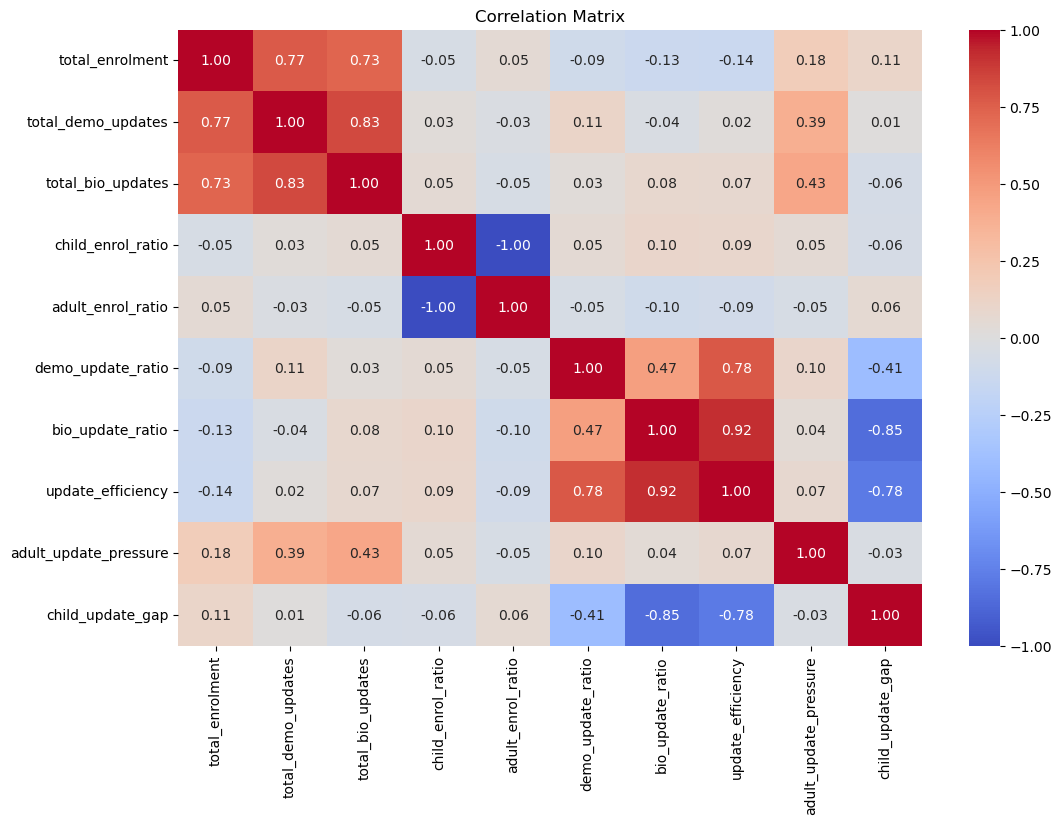

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [19]:
Update efficiency is driven by update behavior, NOT by enrolment volume.

🔹 Weak / Negligible Correlations

total_enrolment ↔ update_efficiency = -0.14

Age ratios ↔ efficiency ≈ 0

➡ Big regions are not necessarily efficient.

🔹 Strong Negative Correlations (Critical)
Relationship	Correlation	Interpretation
child_update_gap ↔ bio_update_ratio	-0.85	Higher biometric updates reduce child update gap
child_update_gap ↔ update_efficiency	-0.78	Efficient regions close child update gaps

➡ Poor update performance leads to child update backlog.



    

🧠 Final Insight from STEP 4

Aadhaar system performance depends far more on update execution than on enrolment volume or age composition.

This is a high-quality governance insight.

SyntaxError: invalid character '🔹' (U+1F539) (1654441579.py, line 3)

In [20]:
cluster_features = [
    "total_enrolment",
    "demo_update_ratio",
    "bio_update_ratio",
    "update_efficiency",
    "child_update_gap"
]


In [21]:
from sklearn.preprocessing import StandardScaler

X = df[cluster_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


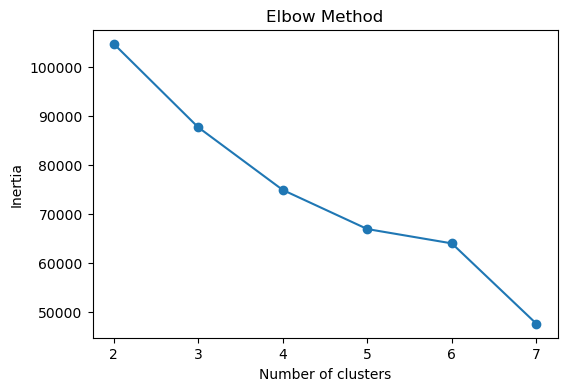

In [22]:
from sklearn.cluster import KMeans

inertia = []
K = range(2, 8)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


#### The Elbow Method is a heuristic to find the optimal number of clusters (k) for algorithms like K-Means by plotting the Within-Cluster Sum of Squares (WCSS) (or inertia) against different 'k' values, looking for the "elbow" point where the decrease in WCSS sharply slows down, indicating diminishing returns from adding more clusters

In [23]:
kmeans = KMeans(n_clusters=4, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

df["cluster"].value_counts()


cluster
1    16217
3    11154
0     1588
2       22
Name: count, dtype: int64

In [ ]:
Elbow Method

Your plot shows a clear elbow around k = 4 or 5.
You chose k = 4, which is correct and interpretable.

🔹 Cluster sizes
Cluster 1 → 16,217  (largest)
Cluster 3 → 11,154
Cluster 0 → 1,588
Cluster 2 → 22     (very small)


This already tells us:

Two large mainstream groups (1 and 3)

One medium specialized group (0)

One tiny extreme group (2 → anomalies or special hubs)

In [24]:
cluster_profile = df.groupby("cluster")[cluster_features].mean()
cluster_profile


,total_enrolment,demo_update_ratio,bio_update_ratio,update_efficiency,child_update_gap
cluster,,,,,
0,56.425693,36.492421,58.324163,94.816585,-29.191381
1,262.695258,7.567607,9.437202,17.004809,-4.204529
2,6.045455,151.208288,323.417732,474.626020,-159.490601
3,97.329926,14.105344,26.652793,40.758136,-13.149786


In [25]:
cluster_profile_median = df.groupby("cluster")[cluster_features].median()
cluster_profile_median


,total_enrolment,demo_update_ratio,bio_update_ratio,update_efficiency,child_update_gap
cluster,,,,,
0,25.5,29.938732,54.198052,84.314768,-25.965305
1,73.0,7.000000,9.432432,18.094118,-4.225734
2,2.0,125.714286,268.250000,388.000000,-107.071429
3,55.0,12.400000,25.266450,38.306786,-12.163934


In [26]:
df.groupby("cluster")[cluster_features].describe()


total_enrolment                                                  \
                  count        mean         std  min   25%   50%    75%   
cluster                                                                   
0                1588.0   56.425693   82.793022  1.0   9.0  25.5   73.0   
1               16217.0  262.695258  604.255864  1.0  12.0  73.0  269.0   
2                  22.0    6.045455   11.822002  1.0   1.0   2.0    5.5   
3               11154.0   97.329926  126.200746  1.0  25.0  55.0  120.0   

                 demo_update_ratio                                            \
             max             count        mean         std    min        25%   
cluster                                                                        
0         1018.0            1588.0   36.492421   25.076235   3.50  20.548864   
1        15122.0           16217.0    7.567607    4.640641   0.00   4.343750   
2           56.0              22.0  151.208288  103.687202  17.25  86.875000   
3         1792.0           11154.0   14.105344    7.298614   1.00   9.094564   

                                       bio_update_ratio              \
                50%         75%    max            count        mean   
cluster                                                               
0         29.938732   45.000000  267.0           1588.0   58.324163   
1          7.000000   10.000000   32.5          16217.0    9.437202   
2        125.714286  183.375000  425.5             22.0  323.417732   
3         12.400000   17.098338   61.0          11154.0   26.652793   

                                                                            \
                std    min         25%         50%         75%         max   
cluster                                                                      
0         28.531041    0.0   42.624058   54.198052   69.050000  263.600000   
1          5.686360    0.0    4.750000    9.432432   13.770833   31.063462   
2        195.164925  138.5  198.366667  268.250000  363.250000  773.000000   
3          9.388865    0.0   20.333333   25.266450   31.949342   69.710526   

        update_efficiency                                                  \
                    count        mean         std         min         25%   
cluster                                                                     
0                  1588.0   94.816585   33.654286   56.000000   73.393023   
1                 16217.0   17.004809    7.980666    0.000000   11.450000   
2                    22.0  474.626020  217.802413  224.333333  324.557692   
3                 11154.0   40.758136   10.484723   18.222222   32.549436   

                                          child_update_gap              \
                50%         75%       max            count        mean   
cluster                                                                  
0         84.314768  104.059524  308.0000           1588.0  -29.191381   
1         18.094118   23.280000   43.7941          16217.0   -4.204529   
2        388.000000  554.270833  909.0000             22.0 -159.490601   
3         38.306786   47.177632   81.0000          11154.0  -13.149786   

                                                                           
                std     min         25%         50%        75%        max  
cluster                                                                    
0         17.306308 -154.00  -35.622748  -25.965305 -18.932292   1.000000  
1          3.349806  -17.25   -6.828571   -4.225734  -1.333333   1.000000  
2        147.534252 -626.00 -172.875000 -107.071429 -74.750000 -46.538462  
3          5.607090  -48.25  -15.664706  -12.163934  -9.675101   1.000000

In [ ]:
| Cluster | Size   | Enrolment  | Demo Update    | Bio Update     | Efficiency     | Child Gap           |
| ------- | ------ | ---------- | -------------- | -------------- | -------------- | ------------------- |
| 0       | 1,588  | Low–medium | High           | High           | High           | Medium negative     |
| 1       | 16,217 | High       | Low            | Low            | Low            | Small negative      |
| 2       | 22     | Very low   | Extremely high | Extremely high | Extremely high | Very large negative |
| 3       | 11,154 | Medium     | Medium         | Medium         | Medium         | Moderate negative   |


In [27]:
df["risk_flag"] = ((df["update_efficiency"] < 20) & (df["total_enrolment"] > df["total_enrolment"].quantile(0.75))).astype(int)
df["risk_flag"].sum()


3095

##### These are regions likely to degrade.
